# Forecasting

In [1]:
%load_ext autoreload
%autoreload 2

import pysm
from fgbuster import get_instrument, get_sky, get_observation
import healpy as hp
import numpy as np
from fgbuster import xForecast, CMB, Dust, Synchrotron

nside = 64
# define sky and foregrounds simulations
sky = get_sky(nside, 'd0s0')
# define instrument
instrument = get_instrument('SO_SAT')
# get noiseless frequency maps
freq_maps = get_observation(instrument, sky)
# take only the Q and U maps
freq_maps = freq_maps[:,1:]

/home/travis/virtualenv/python3.6.7/lib/python3.6/site-packages/pysm/utils/data.py:42: UserWarning: Retrieve data for pysm_2/dust_t_new.fits (if not cached already)
  warnings.warn(f"Retrieve data for {filename} (if not cached already)")


/home/travis/virtualenv/python3.6.7/lib/python3.6/site-packages/pysm/utils/data.py:42: UserWarning: Retrieve data for pysm_2/dust_q_new.fits (if not cached already)
  warnings.warn(f"Retrieve data for {filename} (if not cached already)")
/home/travis/virtualenv/python3.6.7/lib/python3.6/site-packages/pysm/utils/data.py:42: UserWarning: Retrieve data for pysm_2/dust_u_new.fits (if not cached already)
  warnings.warn(f"Retrieve data for {filename} (if not cached already)")


/home/travis/virtualenv/python3.6.7/lib/python3.6/site-packages/pysm/utils/data.py:42: UserWarning: Retrieve data for pysm_2/synch_t_new.fits (if not cached already)
  warnings.warn(f"Retrieve data for {filename} (if not cached already)")
/home/travis/virtualenv/python3.6.7/lib/python3.6/site-packages/pysm/utils/data.py:42: UserWarning: Retrieve data for pysm_2/synch_q_new.fits (if not cached already)
  warnings.warn(f"Retrieve data for {filename} (if not cached already)")


/home/travis/virtualenv/python3.6.7/lib/python3.6/site-packages/pysm/utils/data.py:42: UserWarning: Retrieve data for pysm_2/synch_u_new.fits (if not cached already)
  warnings.warn(f"Retrieve data for {filename} (if not cached already)")


In [2]:
# create 3% circular sky mask
RA = 2*np.pi-70.*np.pi/180
DEC = np.pi/2+70.*np.pi/180
radius = 34*np.pi/180
mask_circular = np.zeros(12*nside**2)
for ipix in range(12*nside**2):
    theta, phi = hp.pix2ang(nside, ipix)
    if (((phi - RA)**2 + (theta - DEC)**2 <= radius**2)):
        mask_circular[ipix] = 1.0
    if (((phi - RA+2*np.pi)**2 + (theta - DEC)**2 <= radius**2)):
        mask_circular[ipix] = 1.0
# applying mask to observed frequency maps
freq_maps[...,mask_circular==0] = 0.0

In [3]:
# define components used in the modeling
components = [CMB(), Dust(150.), Synchrotron(150.)]

fsky =  0.030192057291666668
======= ESTIMATION OF SPECTRAL PARAMETERS =======


res.x =  [ 1.53999982 20.         -3.00000003]
======= ESTIMATION OF NOISE AFTER COMP SEP =======
======= COMPUTATION OF CL_FGS =======


======= ESTIMATION OF STAT AND SYS RESIDUALS =======
======= OPTIMIZATION OF COSMO LIKELIHOOD =======


bounds on r =  0.0009862521794868784  /  0.0010328281259410286
starting point =  0.0010092715146305707
    ===>> fitted r =  [0.001]
======= ESTIMATION OF SIGMA(R) =======


ind_sr_min =  2
sr_grid[ind_sr_min-1] =  [0.00133352]
sr_grid[ind_sr_min+1] =  [0.00237136]
sr_grid =  [[9.99995081e-04]
 [1.33351515e-03]
 [1.77827139e-03]
 [2.37136350e-03]
 [3.16226470e-03]
 [4.21694861e-03]
 [5.62339250e-03]
 [7.49891596e-03]
 [9.99996720e-03]
 [1.33351733e-02]
 [1.77827431e-02]
 [2.37136739e-02]
 [3.16226988e-02]
 [4.21695553e-02]
 [5.62340173e-02]
 [7.49892826e-02]
 [9.99998360e-02]
 [1.33351952e-01]
 [1.77827722e-01]
 [2.37137128e-01]
 [3.16227507e-01]
 [4.21696244e-01]
 [5.62341095e-01]
 [7.49894056e-01]
 [1.00000000e+00]]
case # 3
bounds on sigma(r) =  [0.00133352]  /  [0.00237136]
starting point =  [0.00177827]


    ===>> sigma(r) =  [0.00070175]
======= GRIDDING COSMO LIKELIHOOD =======


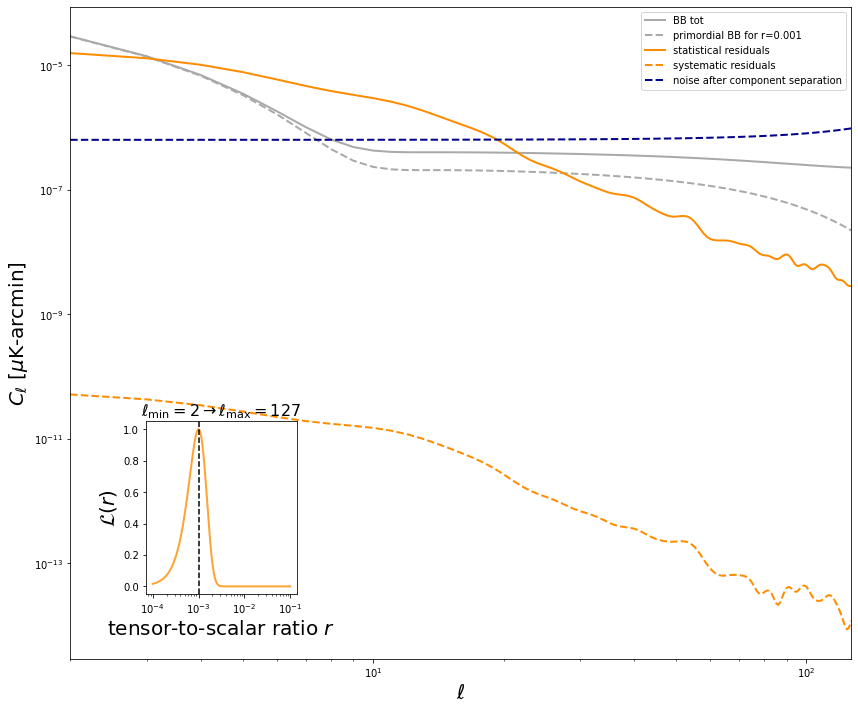

In [4]:
# call for xForecast
# with lmin=2, lmax=2*nside-1, and Alens=0.1
# you can try with make_figure=True if you want to output angular power spectra and profile likelihood on r
res = xForecast(components, instrument, freq_maps, 2, 2*nside-1, Alens=0.1, r=0.001, make_figure=True)